# Measuring multiscale curvature and valley width in synthetic landscapes



In [4]:
import sys
sys.path.append('..')
sys.path.append('../TopoAnalysis/')

In [5]:
import rasterio
import numpy as np

In [6]:
from TopoAnalysis.datasets import triangle_grid, sinusoid_grid
from TopoAnalysis.dem import Elevation, FilledElevation, FlowDirectionD8, Area
from TopoAnalysis.dem import MultiscaleCurvatureValleyWidth as MCVW

In [7]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10, 10)

## Triangular landscape

In [8]:
ny, nx = [500, 500]
width = 100

In [9]:
triangle = triangle_grid(ny, nx, width, sig=0.01)

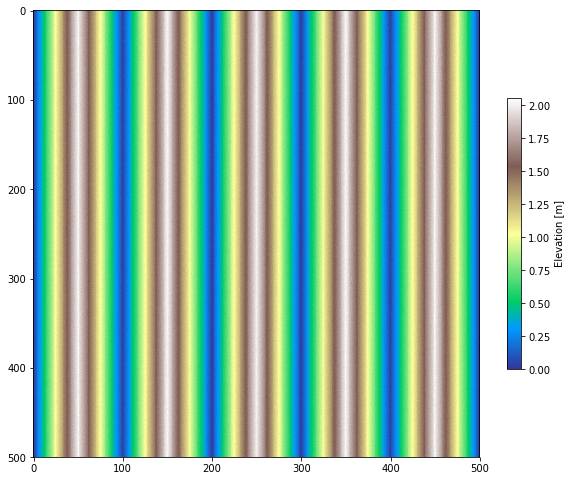

In [10]:
im = plt.imshow(triangle._griddata, cmap='terrain')
cb = plt.colorbar(im, label='Elevation [m]', shrink=0.5)

Text(0, 0.5, 'Elevation')

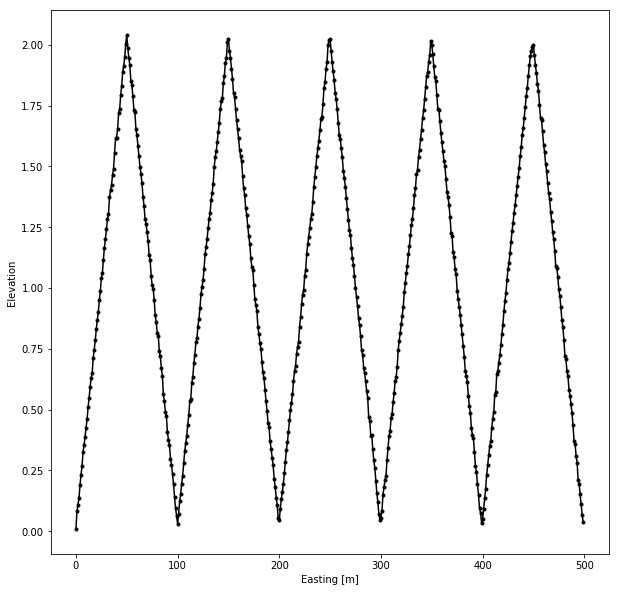

In [11]:
plt.plot(triangle._griddata[100, :], 'k.-')
plt.xlabel('Easting [m]')
plt.ylabel('Elevation')

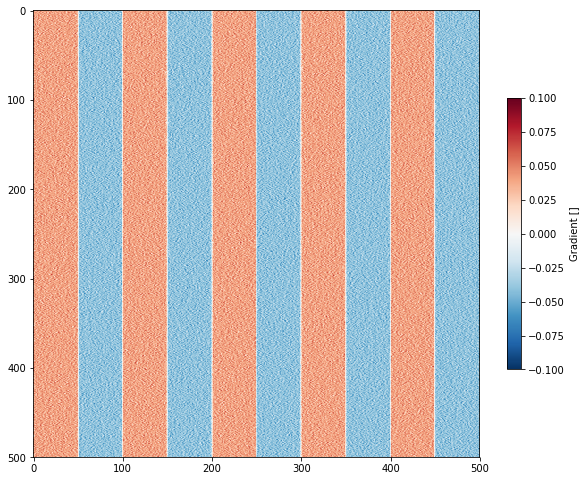

In [12]:
im = plt.imshow(np.gradient(triangle._griddata, axis=1), cmap='RdBu_r', vmin=-0.1, vmax=0.1)
cb = plt.colorbar(im, label='Gradient []', shrink=0.5)

In [17]:
filled = FilledElevation(elevation=triangle)
fd = FlowDirectionD8(flooded_dem=filled)
area = Area(flow_direction=fd)

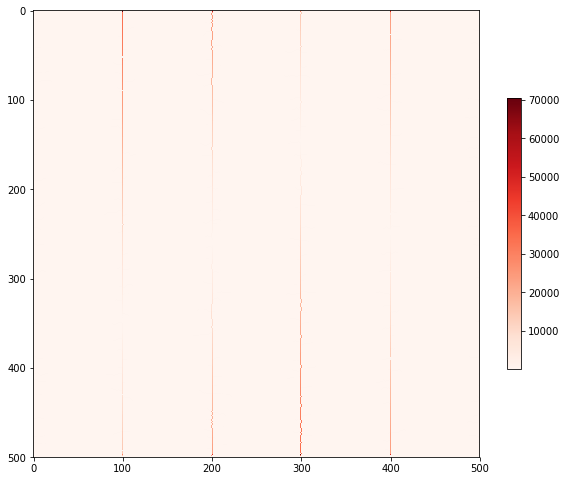

In [18]:
im = plt.imshow(area._griddata, cmap='Reds')
plt.colorbar(im, shrink=0.5)

In [19]:
ms = MCVW(elevation=triangle, area=area, area_cutoff=1e3, min_width=10, max_width=110)

scale 1 / 100 10.0
scale 2 / 100 11.0
scale 3 / 100 12.0
scale 4 / 100 13.0
scale 5 / 100 14.0
scale 6 / 100 15.0
scale 7 / 100 16.0
scale 8 / 100 17.0
scale 9 / 100 18.0
scale 10 / 100 19.0
scale 11 / 100 20.0
scale 12 / 100 21.0
scale 13 / 100 22.0
scale 14 / 100 23.0
scale 15 / 100 24.0
scale 16 / 100 25.0
scale 17 / 100 26.0
scale 18 / 100 27.0
scale 19 / 100 28.0
scale 20 / 100 29.0
scale 21 / 100 30.0
scale 22 / 100 31.0
scale 23 / 100 32.0
scale 24 / 100 33.0
scale 25 / 100 34.0
scale 26 / 100 35.0
scale 27 / 100 36.0
scale 28 / 100 37.0
scale 29 / 100 38.0
scale 30 / 100 39.0
scale 31 / 100 40.0
scale 32 / 100 41.0
scale 33 / 100 42.0
scale 34 / 100 43.0
scale 35 / 100 44.0
scale 36 / 100 45.0
scale 37 / 100 46.0
scale 38 / 100 47.0
scale 39 / 100 48.0
scale 40 / 100 49.0
scale 41 / 100 50.0
scale 42 / 100 51.0
scale 43 / 100 52.0
scale 44 / 100 53.0
scale 45 / 100 54.0
scale 46 / 100 55.0
scale 47 / 100 56.0
scale 48 / 100 57.0
scale 49 / 100 58.0
scale 50 / 100 59.0
scale 51 

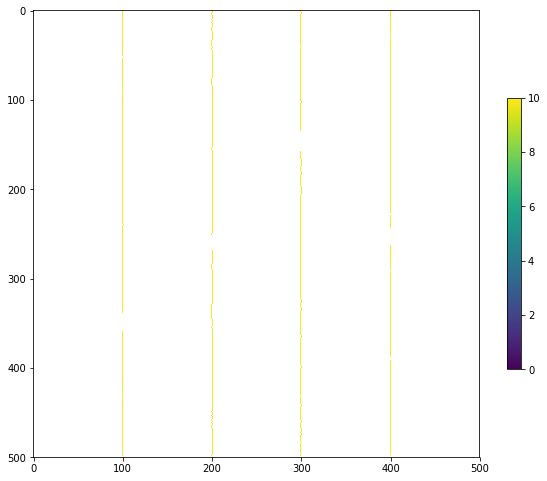

In [20]:
im = plt.imshow(ms._griddata, vmin=0)
plt.colorbar(im, shrink=0.5)

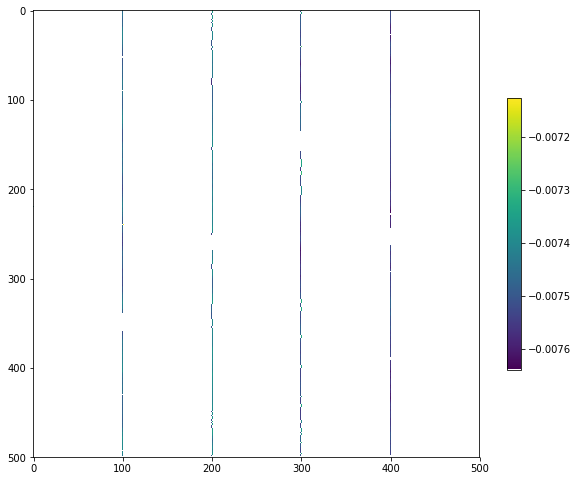

In [21]:
im = plt.imshow(ms._minC)
plt.colorbar(im, shrink=0.5)

## Sinusoidal landscape

In [13]:
sinusoid = sinusoid_grid(ny, nx, width, sig=0.01)

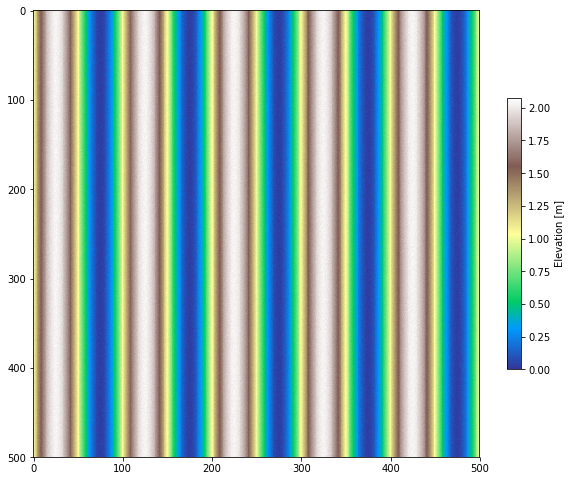

In [14]:
im = plt.imshow(sinusoid._griddata, cmap='terrain')
cb = plt.colorbar(im, label='Elevation [m]', shrink=0.5)

Text(0, 0.5, 'Elevation')

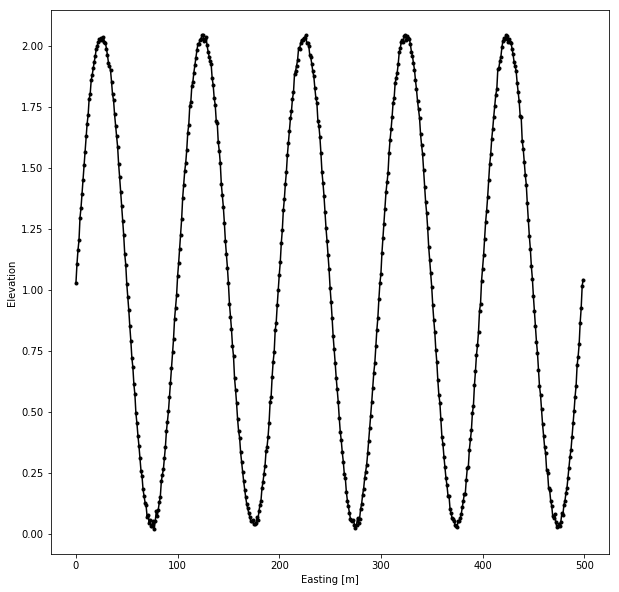

In [15]:
plt.plot(sinusoid._griddata[100, :], 'k.-')
plt.xlabel('Easting [m]')
plt.ylabel('Elevation')

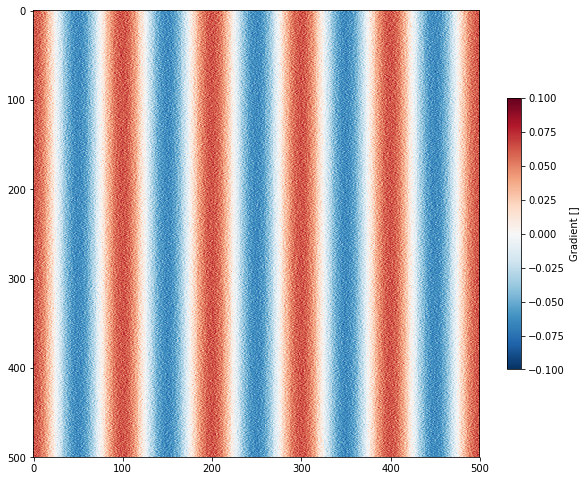

In [16]:
im = plt.imshow(np.gradient(sinusoid._griddata, axis=1), cmap='RdBu_r', vmin=-0.1, vmax=0.1)
cb = plt.colorbar(im, label='Gradient []', shrink=0.5)

In [22]:
filled = FilledElevation(elevation=sinusoid)
fd = FlowDirectionD8(flooded_dem=filled)
area = Area(flow_direction=fd)

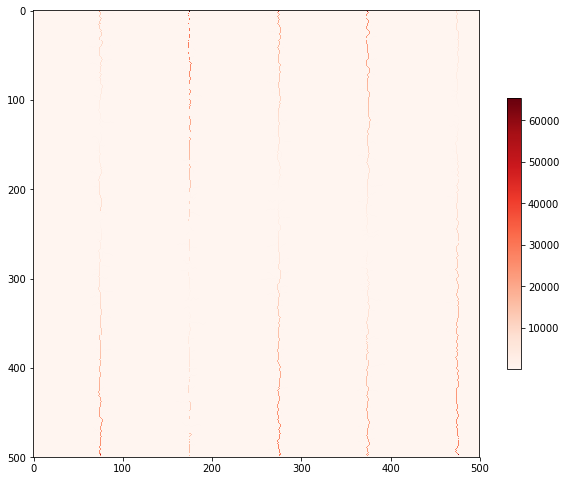

In [23]:
im = plt.imshow(area._griddata, cmap='Reds')
plt.colorbar(im, shrink=0.5)

In [24]:
ms = MCVW(elevation=sinusoid, area=area, area_cutoff=1e3, min_width=10, max_width=110)

scale 1 / 100 10.0
scale 2 / 100 11.0
scale 3 / 100 12.0
scale 4 / 100 13.0
scale 5 / 100 14.0
scale 6 / 100 15.0
scale 7 / 100 16.0
scale 8 / 100 17.0
scale 9 / 100 18.0
scale 10 / 100 19.0
scale 11 / 100 20.0
scale 12 / 100 21.0
scale 13 / 100 22.0
scale 14 / 100 23.0
scale 15 / 100 24.0
scale 16 / 100 25.0
scale 17 / 100 26.0
scale 18 / 100 27.0
scale 19 / 100 28.0
scale 20 / 100 29.0
scale 21 / 100 30.0
scale 22 / 100 31.0
scale 23 / 100 32.0
scale 24 / 100 33.0
scale 25 / 100 34.0
scale 26 / 100 35.0
scale 27 / 100 36.0
scale 28 / 100 37.0
scale 29 / 100 38.0
scale 30 / 100 39.0
scale 31 / 100 40.0
scale 32 / 100 41.0
scale 33 / 100 42.0
scale 34 / 100 43.0
scale 35 / 100 44.0
scale 36 / 100 45.0
scale 37 / 100 46.0
scale 38 / 100 47.0
scale 39 / 100 48.0
scale 40 / 100 49.0
scale 41 / 100 50.0
scale 42 / 100 51.0
scale 43 / 100 52.0
scale 44 / 100 53.0
scale 45 / 100 54.0
scale 46 / 100 55.0
scale 47 / 100 56.0
scale 48 / 100 57.0
scale 49 / 100 58.0
scale 50 / 100 59.0
scale 51 

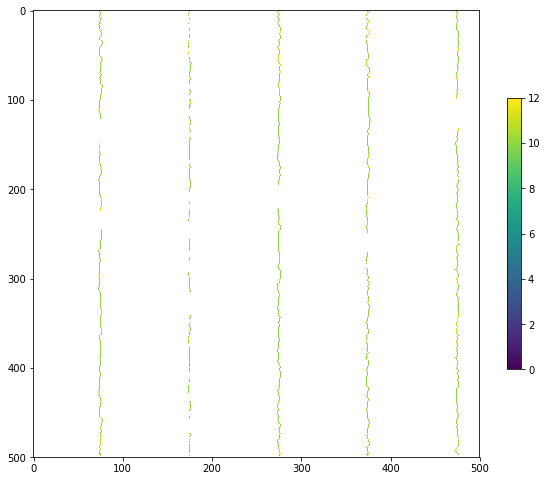

In [25]:
im = plt.imshow(ms._griddata, vmin=0)
plt.colorbar(im, shrink=0.5)

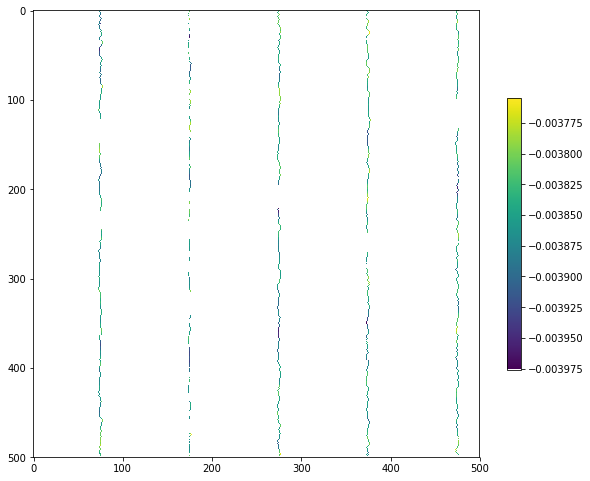

In [26]:
im = plt.imshow(ms._minC)
plt.colorbar(im, shrink=0.5)